In [41]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import crystalball, norm
from epi_analysis import df_make_separation

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/analysis


In [42]:
import pandas as pd

all_vals_df = pd.read_feather("/mnt/work/data/epi/21x21/2022_12_05_cherepaha_SciGlass-4-1-LB_21x21_20x20x400mm_0.7-18GeV_e-pi-_20kev-each.feather")
all_vals_df["e_div_p"] = all_vals_df.de_sum/(all_vals_df.p*1000)
all_vals_df.head()
epi_title = "E/P SciGlass"

In [43]:
all_vals_df.groupby("p").mean().index

Float64Index([0.7, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0], dtype='float64', name='p')

<AxesSubplot:xlabel='p'>

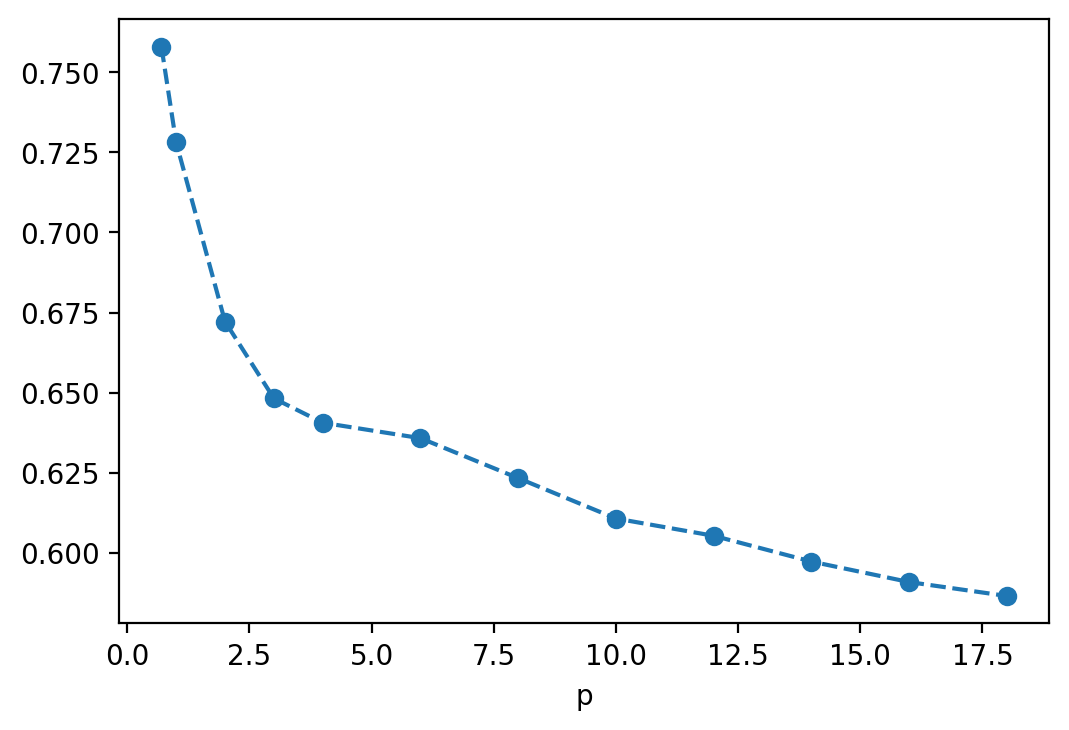

In [44]:
all_vals_df.groupby("p").mean().e_div_p.plot(style="o--")

0.21704834717211216 7.495703708599708 0.9906085523135943 0.0031898179017517867
0.9747647492867285 0.02642050960593833
0.9377675331017177 0.05255 0.0527 0.9473 20000


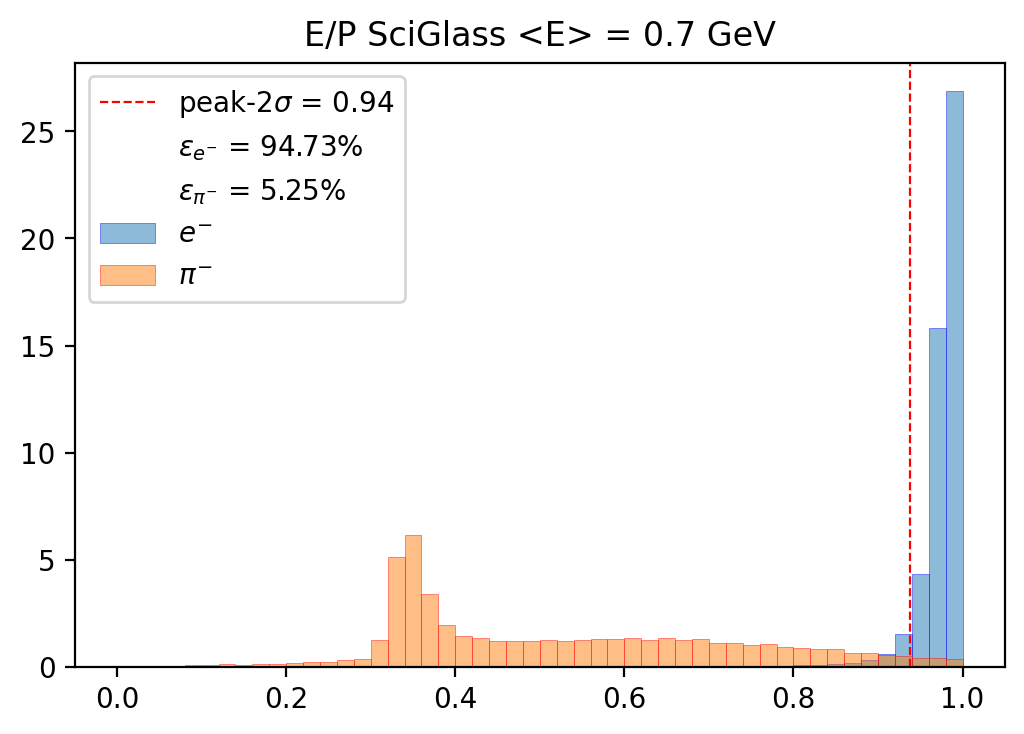

In [45]:
df_make_separation(all_vals_df, 0.7, epi_title)

0.3303356658448036 6.277076700301251 0.9863475221713611 0.004723377076547397
0.971662541075304 0.028010796309041363
0.9303259295532784 0.02345 0.04935 0.95065 20000


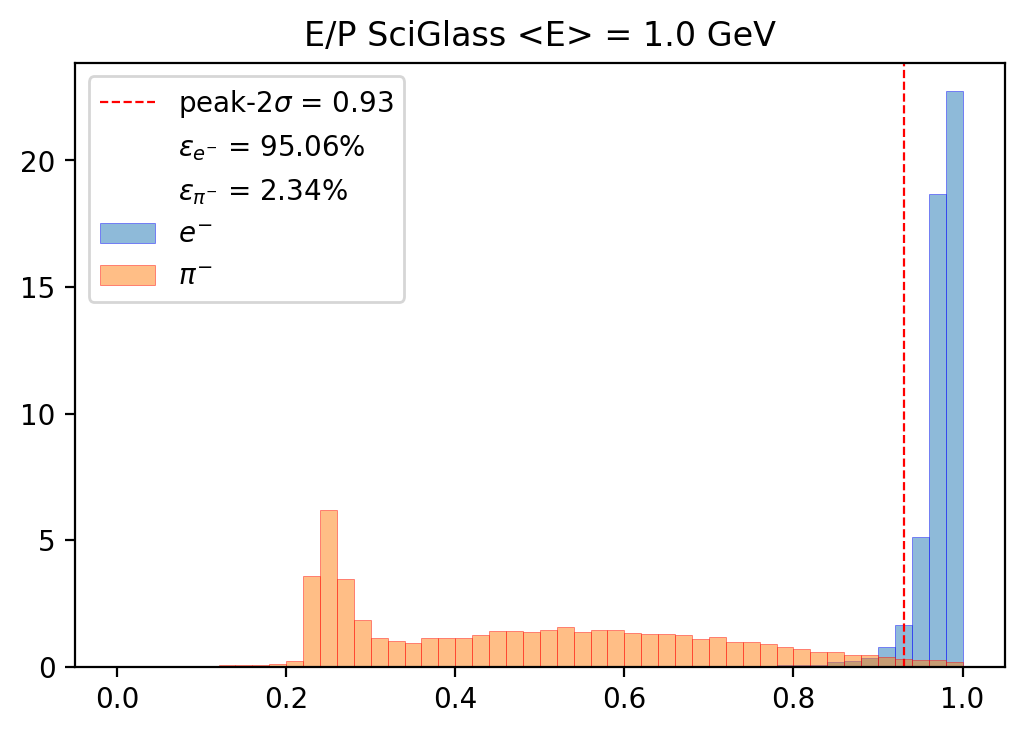

In [46]:
df_make_separation(all_vals_df, 1, epi_title)

0.41423141445591294 6.038208015649858 0.9794481259880106 0.006035559108184196
0.9656039511286614 0.029243799827364116
0.9209605263332823 0.00455 0.04515 0.95485 20000


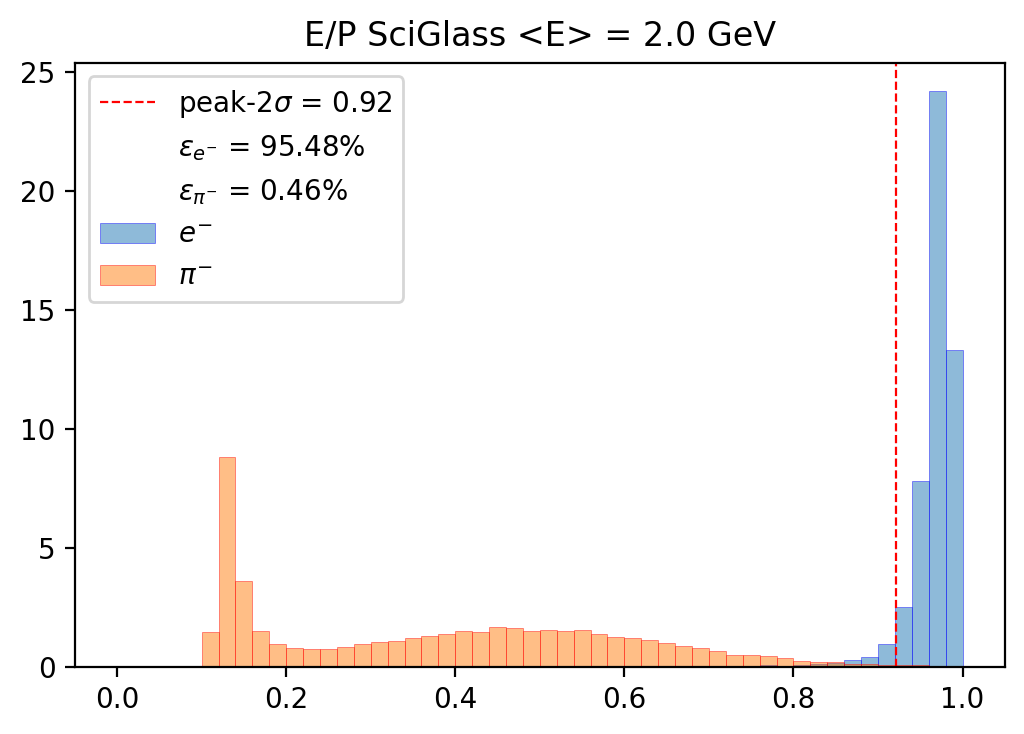

In [47]:
df_make_separation(all_vals_df, 2, epi_title)

0.4126329017085463 6.4766447687114965 0.9670906836180218 0.0074398323312791165
0.9507017988704834 0.03172492914372509
0.9036408253305716 0.0058 0.05815 0.94185 20000


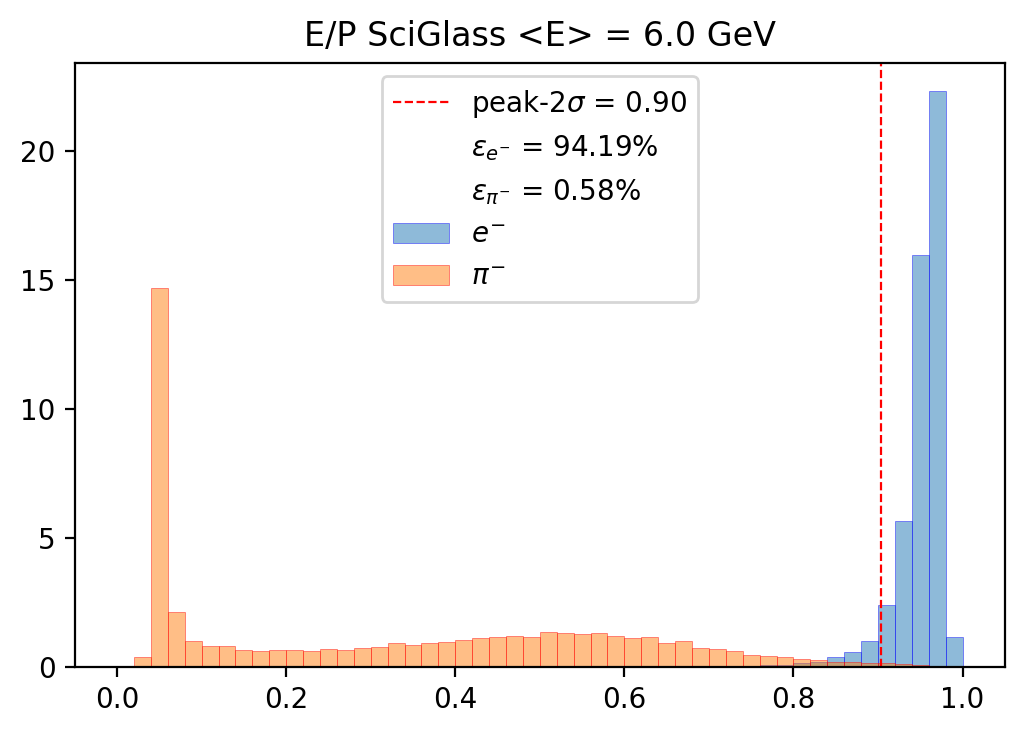

In [48]:
df_make_separation(all_vals_df, 6, epi_title)

0.39795630515114566 7.316346103483425 0.9595426437698082 0.00842703045844291
0.9410939490603203 0.03446663260886344
0.8906093785520813 0.00525 0.06095 0.93905 20000


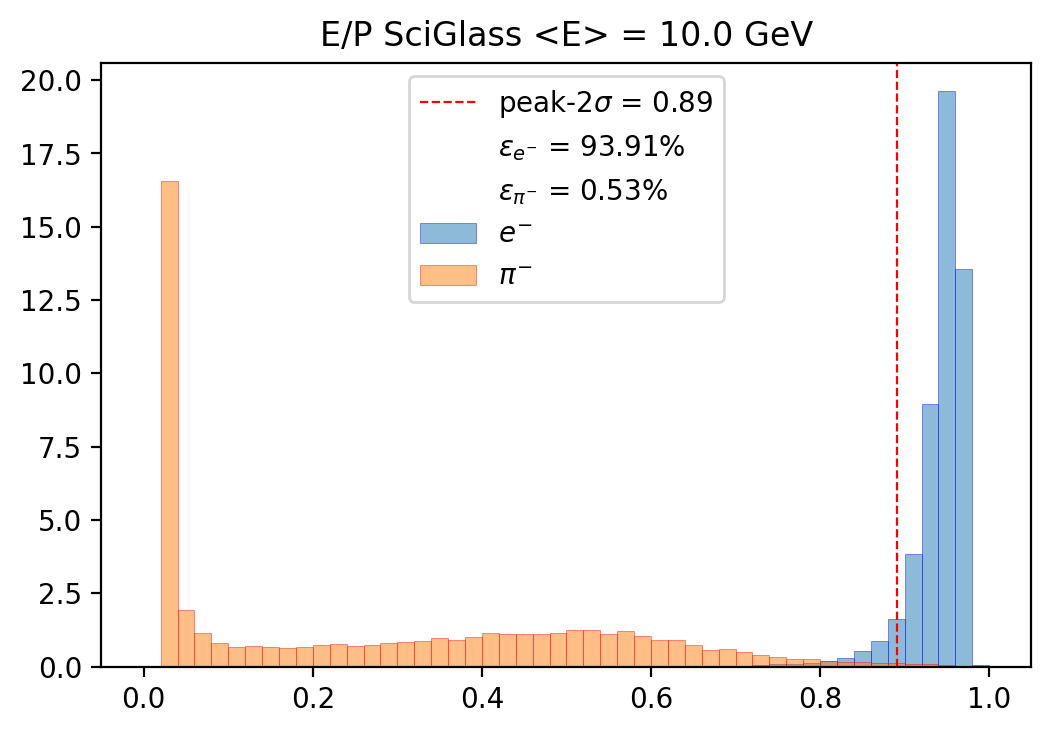

In [49]:
df_make_separation(all_vals_df, 10, epi_title)

0.3862666866017425 8.251014790398418 0.9488704998239194 0.009938111994569286
0.9272555831866772 0.0391187992320822
0.8706329013597549 0.0043 0.0658 0.9342 20000


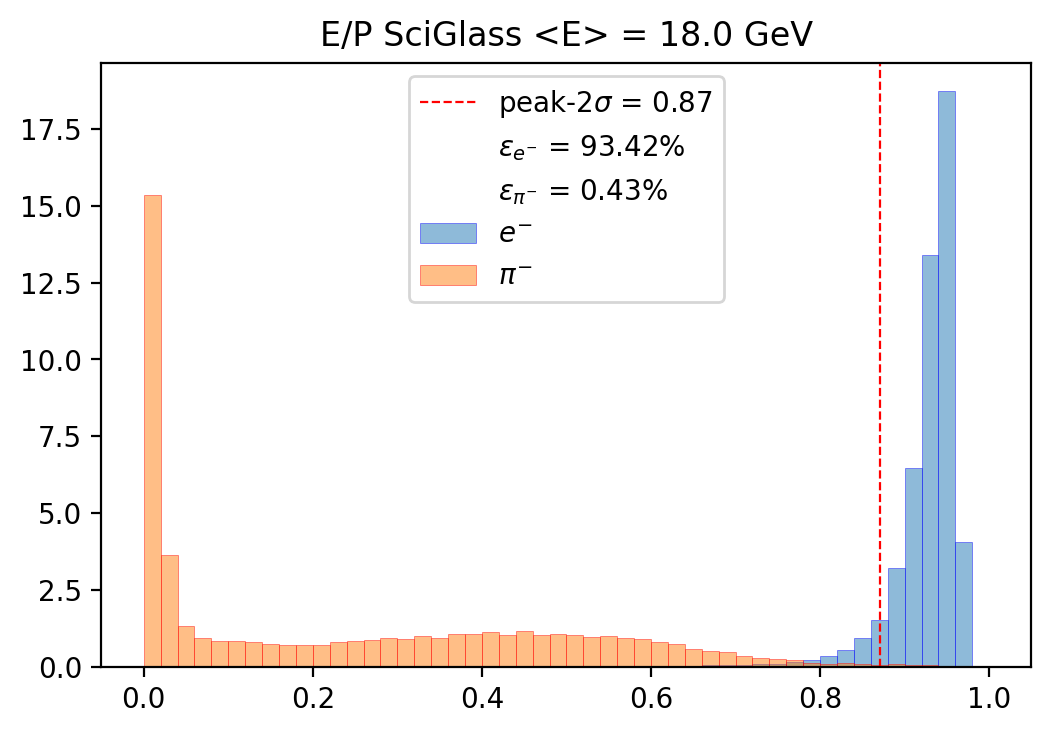

In [50]:
df_make_separation(all_vals_df, 18, epi_title)

0.21704834717211216 7.495703708599708 0.9906085523135943 0.0031898179017517867
0.9747647492867285 0.02642050960593833
0.9377675331017177 0.05255 0.0527 0.9473 20000
None
0.3303356658448036 6.277076700301251 0.9863475221713611 0.004723377076547397
0.971662541075304 0.028010796309041363
0.9303259295532784 0.02345 0.04935 0.95065 20000
None
0.41423141445591294 6.038208015649858 0.9794481259880106 0.006035559108184196
0.9656039511286614 0.029243799827364116
0.9209605263332823 0.00455 0.04515 0.95485 20000
None
0.4360069689217822 6.043235998804644 0.9750388151991984 0.00665204320576589
0.9609652876279404 0.029479370293287097
0.9160800746126242 0.003 0.04925 0.95075 20000
None
0.42086720908877695 6.2826885938880395 0.9720443305351756 0.006895108258201951
0.9570261030460245 0.03006833123741016
0.9119076680603553 0.00345 0.0534 0.9466 20000
None
0.4126329017085463 6.4766447687114965 0.9670906836180218 0.0074398323312791165
0.9507017988704834 0.03172492914372509
0.9036408253305716 0.0058 0.0581

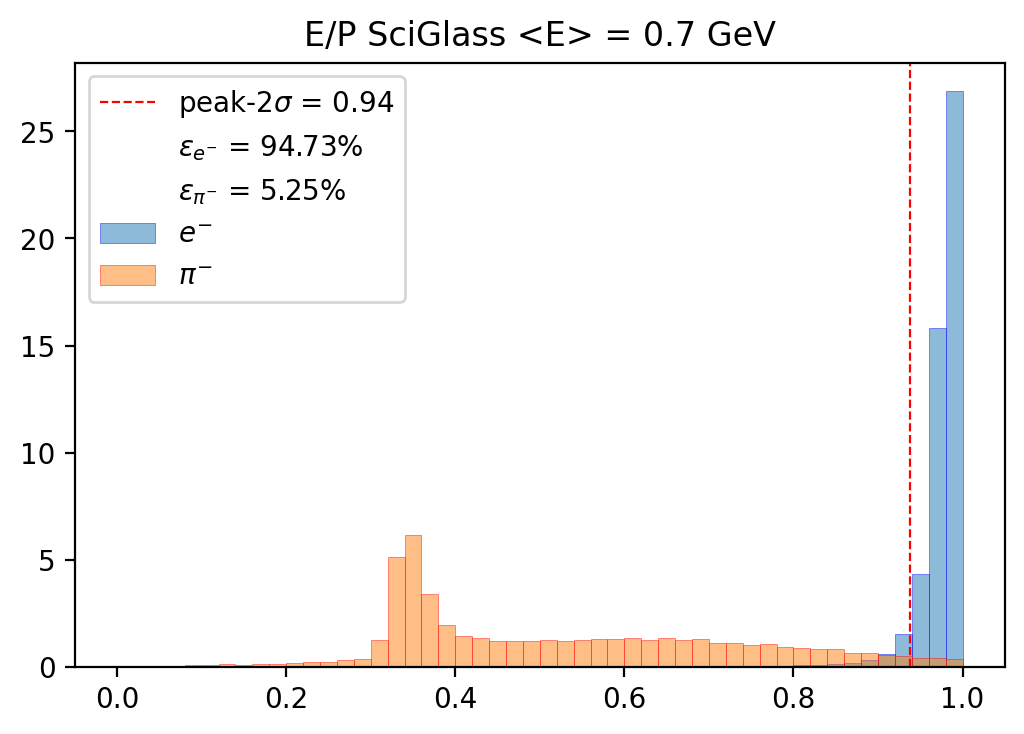

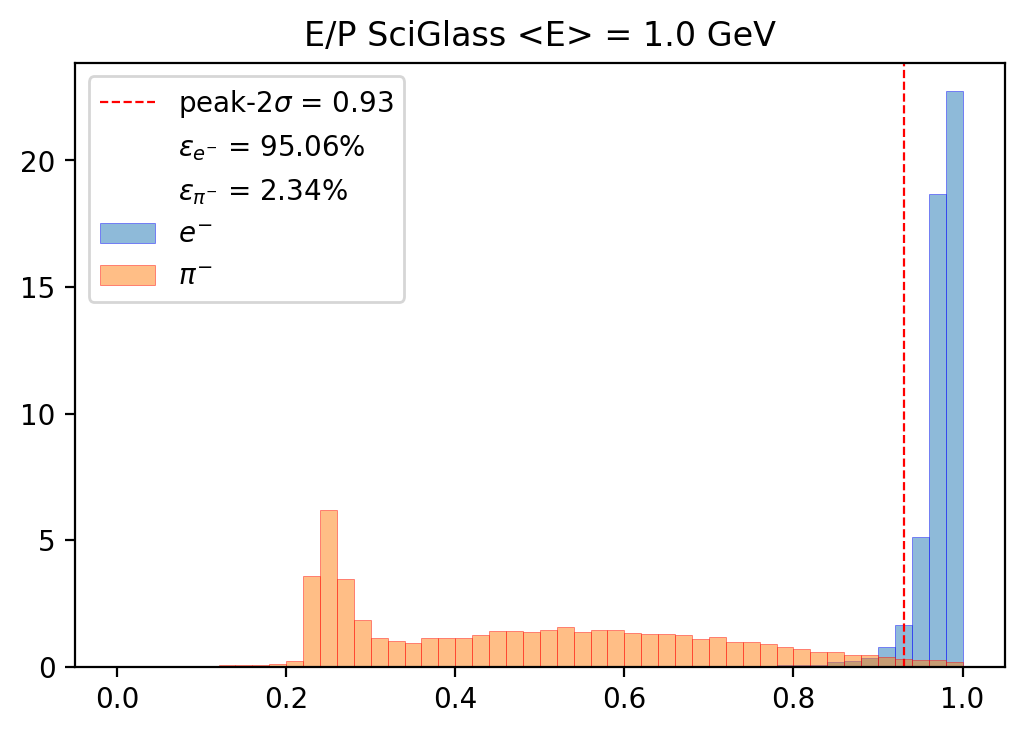

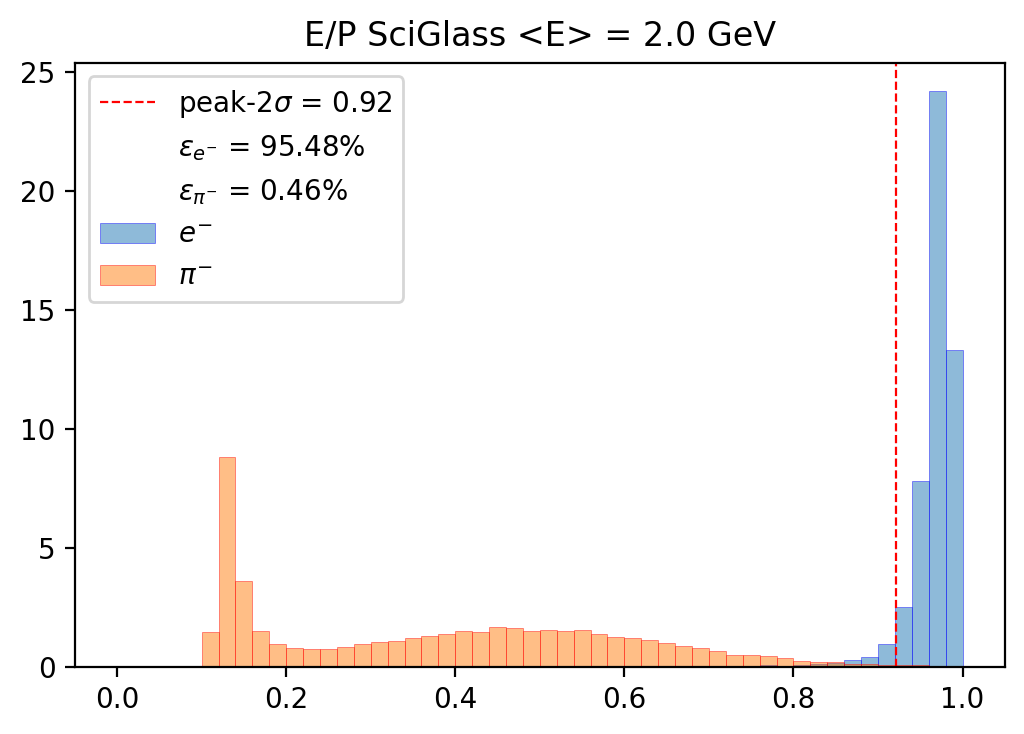

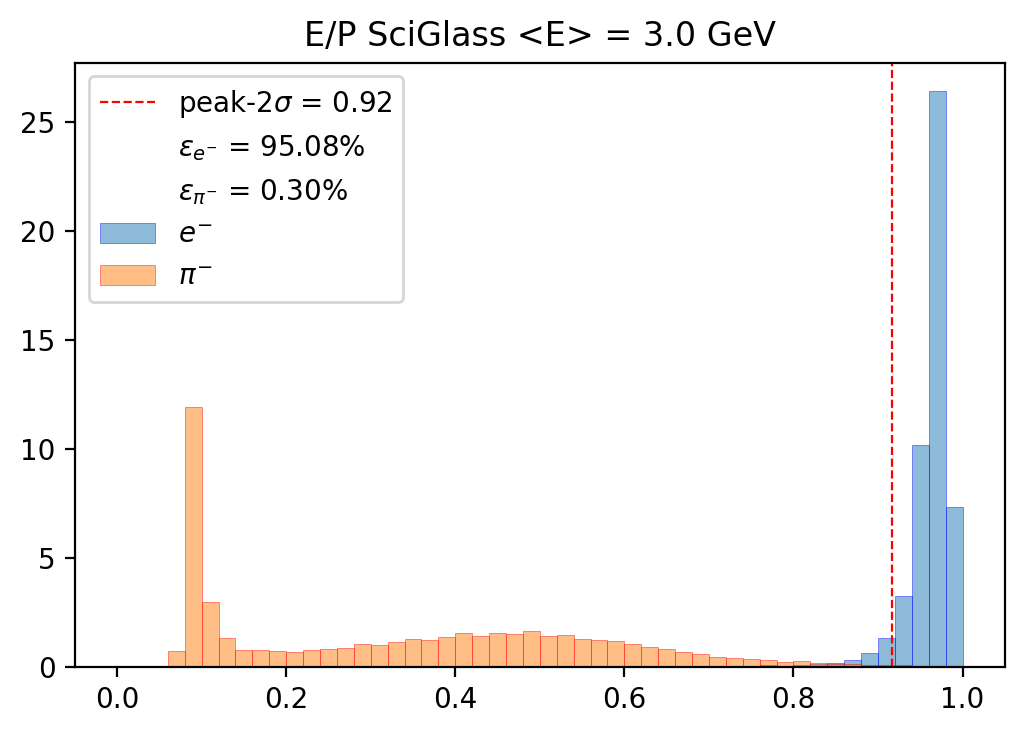

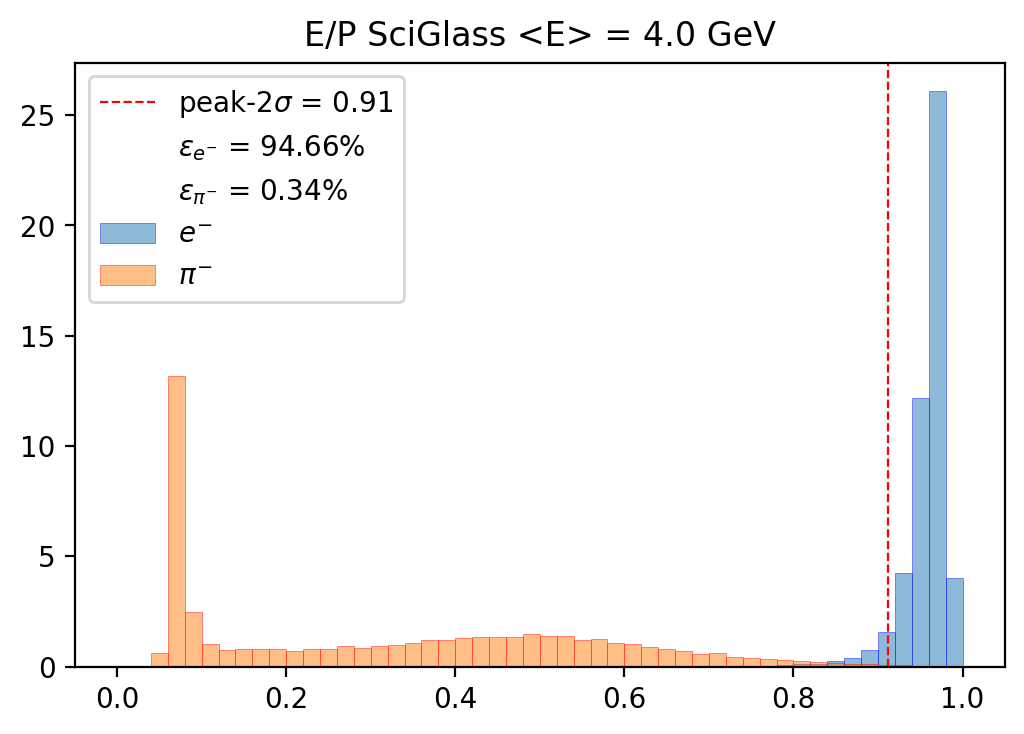

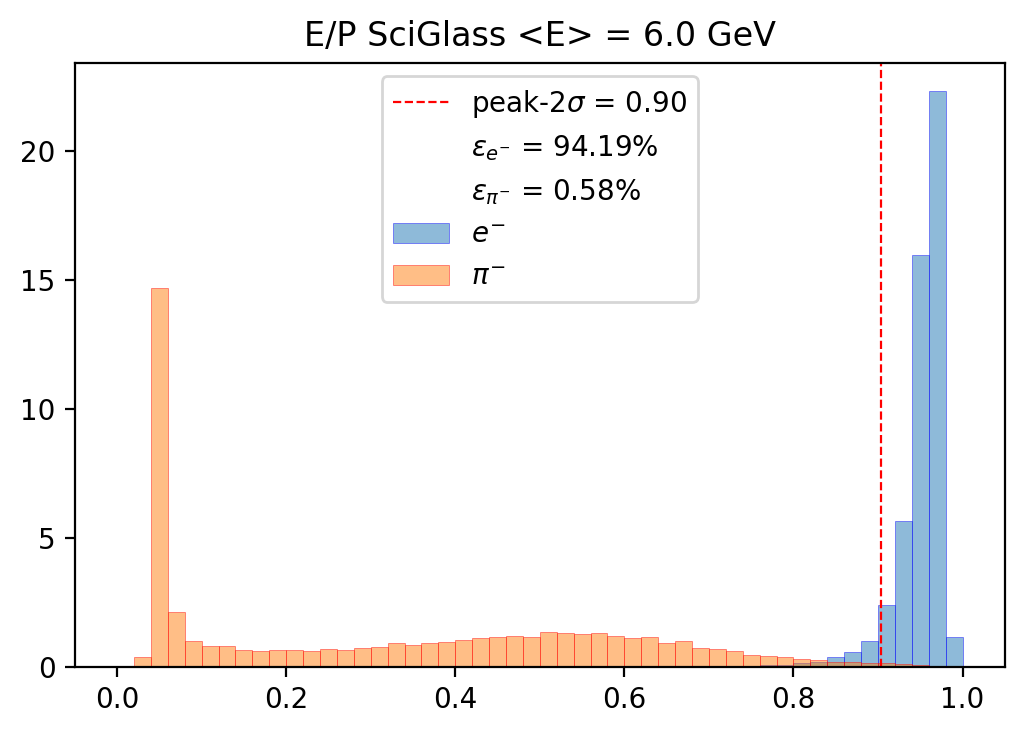

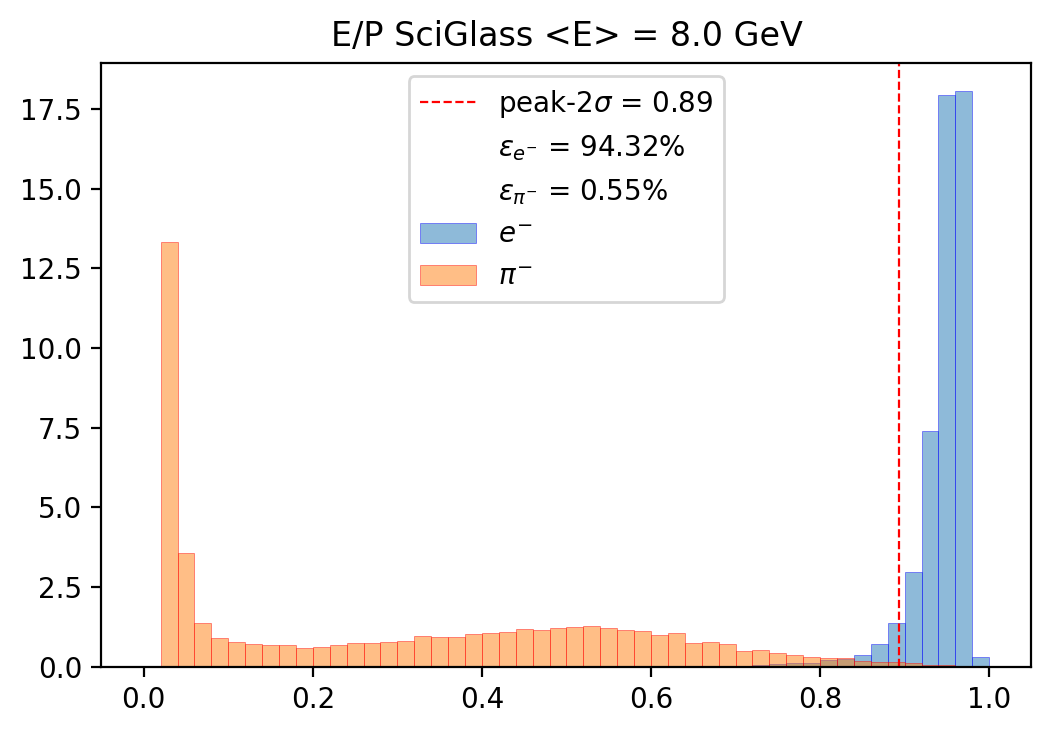

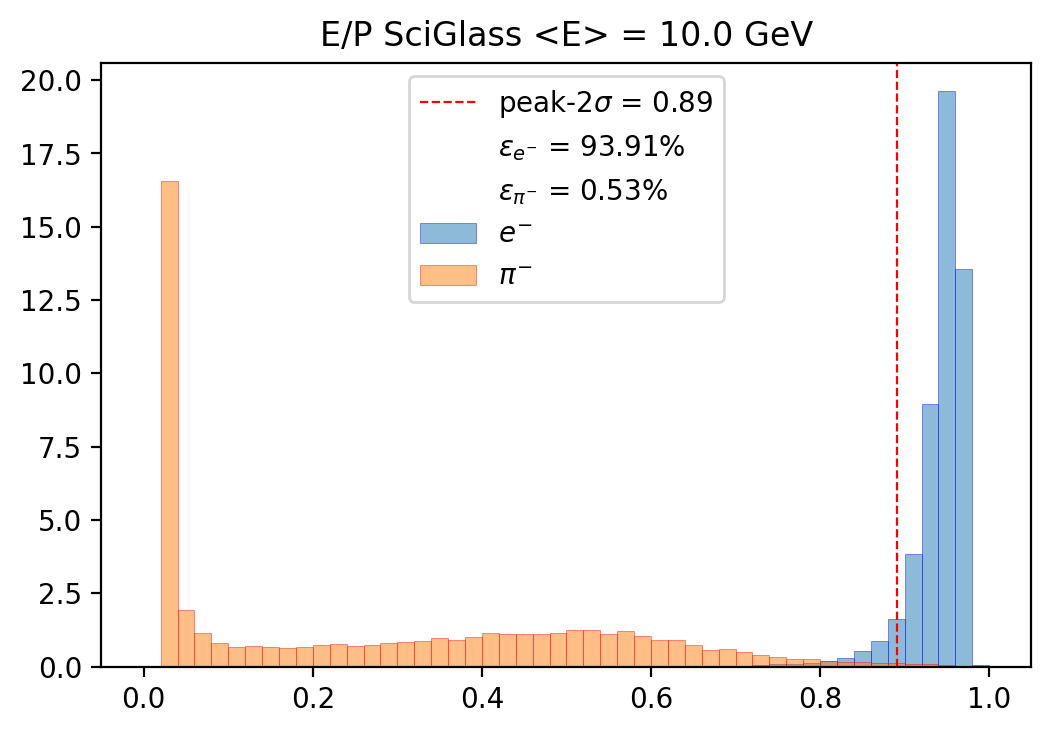

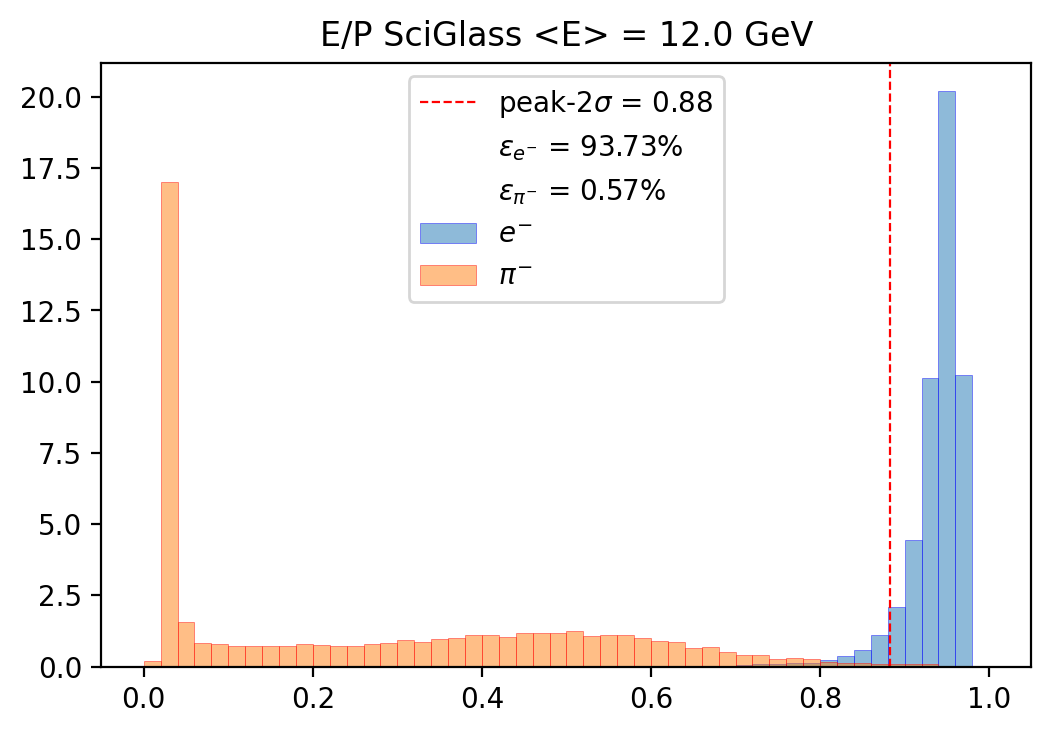

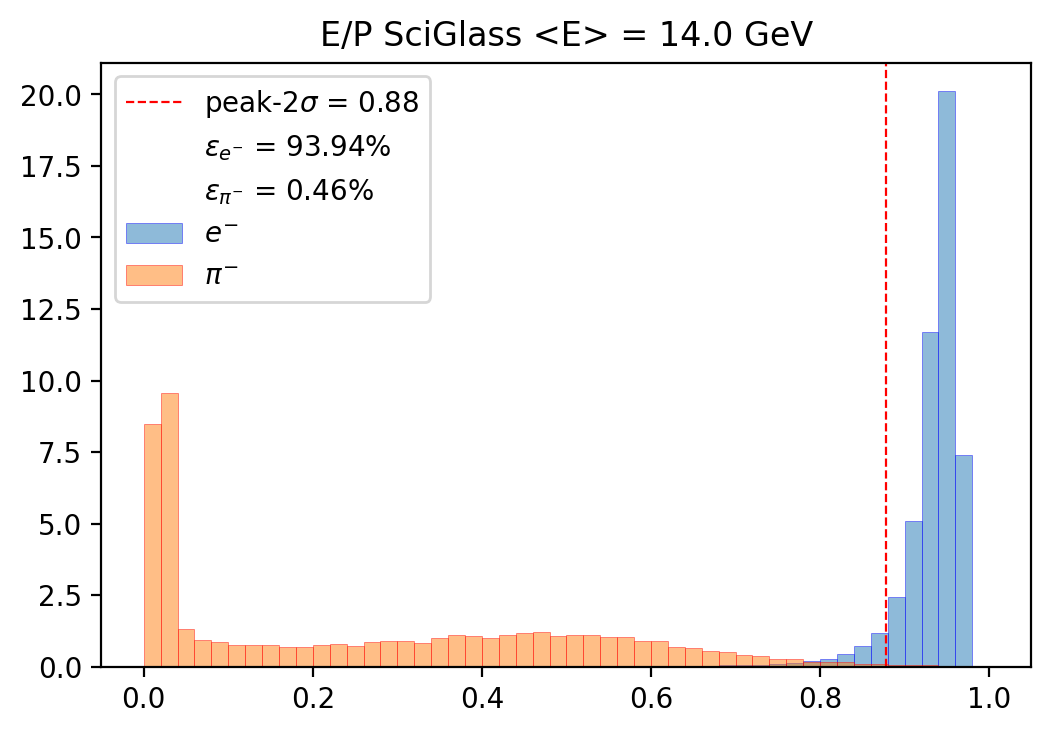

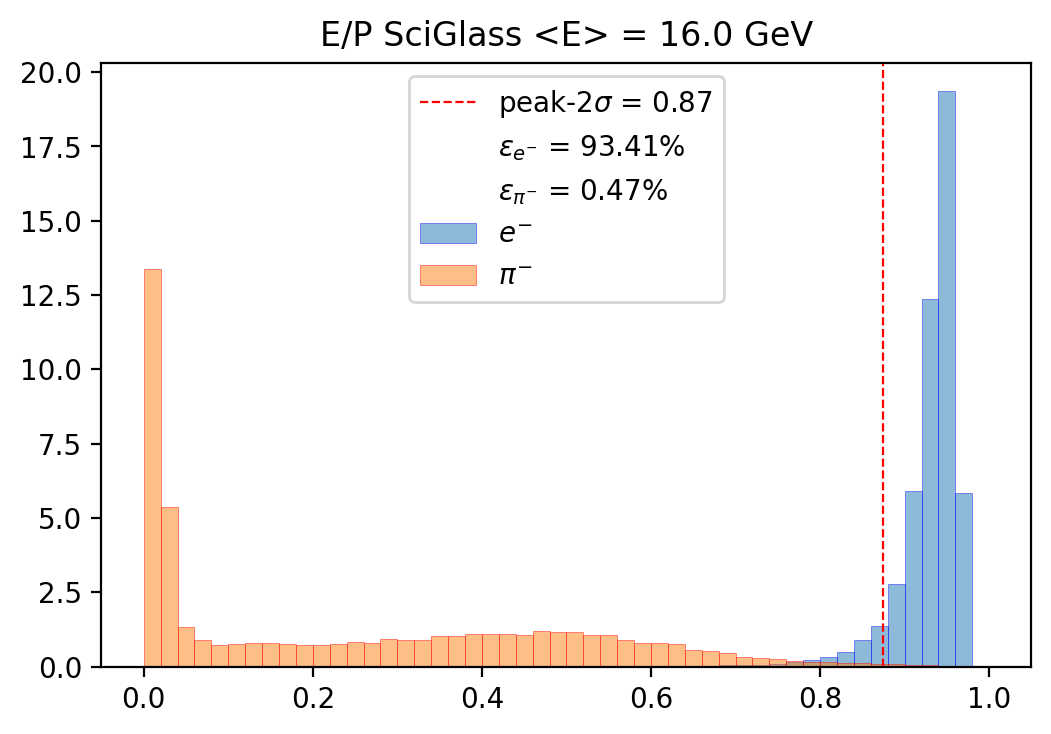

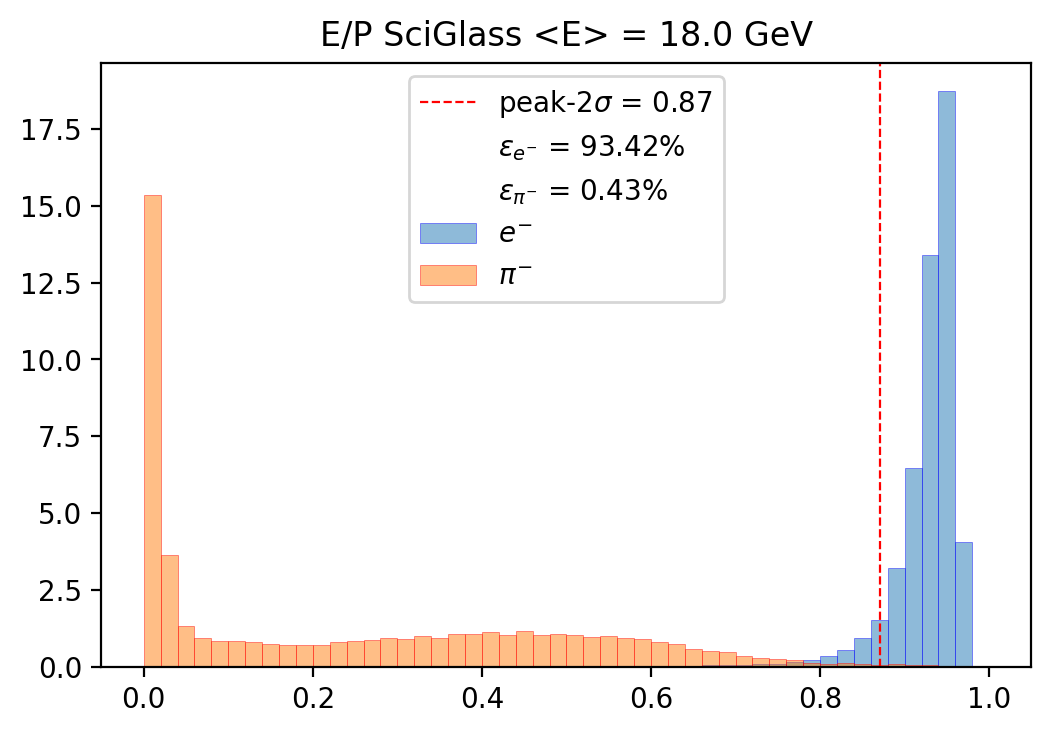

In [51]:
all_momentums = all_vals_df.groupby("p").mean().index

for p in all_momentums:
    data = df_make_separation(all_vals_df, p, epi_title)
    print(data)


